Iter   1 | ELBO: -2023.1868 | σ² min: 1.8651e-01 max: 3.0471e-01
Iter   2 | ELBO: -1064.1118 | σ² min: 1.8435e-01 max: 4.7316e-01
Iter   3 | ELBO: -877.7348 | σ² min: 1.0954e-01 max: 5.0703e-01
Iter   4 | ELBO: -757.5112 | σ² min: 9.2789e-02 max: 3.9919e-01
Iter   5 | ELBO: -686.2568 | σ² min: 6.8935e-02 max: 4.3405e-01
Iter   6 | ELBO: -624.8591 | σ² min: 6.8051e-02 max: 4.9738e-01
Iter   7 | ELBO: -564.3857 | σ² min: 7.5345e-02 max: 4.5314e-01
Iter   8 | ELBO: -494.8291 | σ² min: 7.8300e-02 max: 3.3338e-01
Iter   9 | ELBO: -552.2623 | σ² min: 7.2891e-02 max: 3.1671e-01
Iter  10 | ELBO: -595.3954 | σ² min: 7.9974e-02 max: 3.5237e-01
Iter  11 | ELBO: -579.9274 | σ² min: 7.1908e-02 max: 4.0901e-01
Iter  12 | ELBO: -534.9449 | σ² min: 9.0526e-02 max: 3.4865e-01
Iter  13 | ELBO: -532.4118 | σ² min: 8.5766e-02 max: 3.9544e-01
Iter  14 | ELBO: -509.3863 | σ² min: 7.5751e-02 max: 3.7708e-01
Iter  15 | ELBO: -503.3628 | σ² min: 6.9356e-02 max: 4.1764e-01
Iter  16 | ELBO: -487.4374 | σ² min: 7

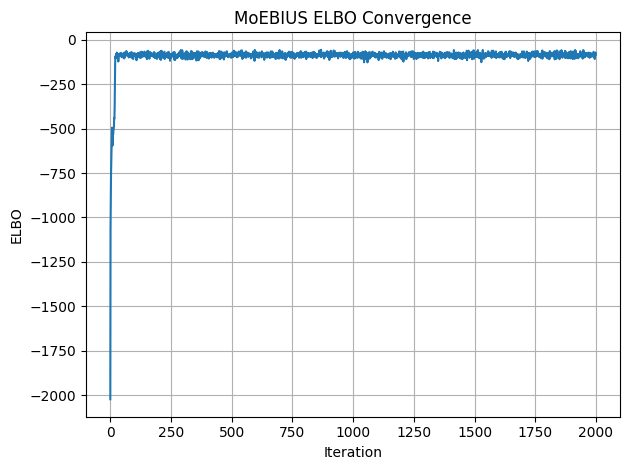

In [ ]:
import torch
import pandas as pd
from MoEBIUS_model import MoEBIUSModel
import matplotlib.pyplot as plt

# --- Load CSV Data ---
X_train = pd.read_csv("X_train.csv").values.astype("float32")
y_train = pd.read_csv("y_train.csv")["y"].values.astype("float32")
X_test = pd.read_csv("X_test.csv").values.astype("float32")
y_test = pd.read_csv("y_test.csv")["y"].values.astype("float32")

# Convert to torch tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train).unsqueeze(1)
X_test_torch = torch.tensor(X_test)
y_test_torch = torch.tensor(y_test).unsqueeze(1)

# --- Train MoEBIUS ---
model = MoEBIUSModel(
    K=3,
    Q=4,
    lr_pi=  0.01,
    lr_beta=0.1,
     max_iter=2000,
     tau_smooth=0.1,
     nu_smooth=0.1,
     normalize=True
)
model.fit(X_train_torch, y_train_torch)

# --- Evaluate ---
mse_train = model.score(X_train_torch, y_train_torch)
mse_test = model.score(X_test_torch, y_test_torch)

print("\n📊 MoEBIUS Final Results:")
print(f"Train MSE: {mse_train:.4f}")
print(f"Test  MSE: {mse_test:.4f}")

# --- Plot ELBO Convergence ---
plt.plot(model.elbo_history)
plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.title("MoEBIUS ELBO Convergence")
plt.grid(True)
plt.tight_layout()
plt.show()
